In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.weightstats import ztest

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
def school_cleaned(text):
    text = str(text)
    if text == 'nan':
        return np.nan
    else:
        text_list = text.split('/')
        return text_list[0]
    
def student_cleaned(text):
    text = str(text)
    if text == 'nan':
        return np.nan
    else:
        text_list = text.split('/')
        if len(text_list) == 1:
            return np.nan
        else:
            return text_list[1]
        
def final_cleaned(text):
    text = str(text)
    if text == 'nan':
        return np.nan
    else:
        text_list = text.split('/')
        if len(text_list) == 2:
            return text_list[1]
        elif len(text_list) == 3:
            return text_list[-1]

def extract_year(text):
    text = str(text)
    result = ''
    for char in text:
        if char.isnumeric() == True:
            result += char
    return result

In [4]:
df1 = pd.read_excel('Capstone Dataset 20210608-183000.xlsx')
df_decision = df1.copy()
df_decision['year'] = [extract_year(ele) for ele in df_decision['Entry Term']]
df_decision = df_decision.replace(df_decision['Tuition Percentage'][0], np.nan)
df_decision['Completed'] = np.where(df_decision['Decision 1'].isna() == True, 0, 1)
df_decision['School_Decision'] = [school_cleaned(ele) for ele in df_decision['Decision 1']]
df_decision['School_Decision'] = df_decision['School_Decision'].replace('Administrative Withdrawal', 'Withdraw')
df_decision['student_Decision'] = [student_cleaned(ele) for ele in df_decision['Decision 1']]
df_decision['student_Decision'] = df_decision['student_Decision'].replace('Accept', 'Accept Offer')
df_decision['final_Decision'] = [final_cleaned(ele) for ele in df_decision['Decision 1']]
df_decision['Been_On_Waitinglist'] = np.where(df_decision['Decision 2'] == "Waitlist", 1 , 0)
df_decision[['Decision 1', 'Decision 2', 'Completed', 'School_Decision', 'student_Decision',
             'final_Decision', 'Been_On_Waitinglist']].head(100)

Decision 1          Decision 2  Completed School_Decision  \
0                  Deny                 NaN          1            Deny   
1    Admit/Accept Offer               Admit          1           Admit   
2                  Deny                 NaN          1            Deny   
3              Waitlist                 NaN          1        Waitlist   
4                   NaN                 NaN          0             NaN   
5                   NaN                 NaN          0             NaN   
6                   NaN                 NaN          0             NaN   
7                  Deny                 NaN          1            Deny   
8                  Deny                 NaN          1            Deny   
9                  Deny                 NaN          1            Deny   
10          Admit/Defer               Admit          1           Admit   
11  Admit/Decline Offer               Admit          1           Admit   
12                  NaN                 NaN          0             NaN   
13                  NaN                 NaN          0             NaN   
14                 Deny                 NaN          1            Deny   
15                  NaN                 NaN          0             NaN   
16                  NaN                 NaN          0             NaN   
17                 Deny                 NaN          1            Deny   
18          Admit/Defer  Admit/Accept Offer          1           Admit   
19   Admit/Accept Offer               Admit          1           Admit   
20    Admit/No Response               Admit          1           Admit   
21    Admit/No Response               Admit          1           Admit   
22                  NaN                 NaN          0             NaN   
23                 Deny                 NaN          1            Deny   
24                 Deny            Waitlist          1            Deny   
25                 Deny            Waitlist          1            Deny   
26    Admit/Accept/Melt  Admit/Accept Offer          1           Admit   
27                 Deny                 NaN          1            Deny   
28                  NaN                 NaN          0             NaN   
29                  NaN                 NaN          0             NaN   
30                  NaN                 NaN          0             NaN   
31                 Deny                 NaN          1            Deny   
32                 Deny                 NaN          1            Deny   
33   Admit/Accept Offer               Admit          1           Admit   
34                  NaN                 NaN          0             NaN   
35                  NaN                 NaN          0             NaN   
36                 Deny                 NaN          1            Deny   
37             Waitlist                 NaN          1        Waitlist   
38   Admit/Accept Offer               Admit          1           Admit   
39                 Deny                 NaN          1            Deny   
40          Admit/Defer  Admit/Accept Offer          1           Admit   
41                 Deny                 NaN          1            Deny   
42                 Deny                 NaN          1            Deny   
43                 Deny                 NaN          1            Deny   
44                 Deny                 NaN          1            Deny   
45                 Deny                 NaN          1            Deny   
46  Admit/Decline Offer               Admit          1           Admit   
47                 Deny                 NaN          1            Deny   
48                  NaN                 NaN          0             NaN   
49                 Deny                 NaN          1            Deny   
50  Admit/Decline Offer               Admit          1           Admit   
51   Admit/Accept Offer               Admit          1           Admit   
52    Admit/Accept/Melt  Admit/Accept Offer          1           Admit   
53               

In [5]:
decision_list = ['year', 'Completed', 'School_Decision', 'student_Decision',
             'final_Decision', 'Been_On_Waitinglist']

In [6]:
df_submitted = df_decision[df_decision['Decision 1'].notnull()]

In [7]:
df_submitted.head(100)

Ref  Application Ref Program (ASE)   Entry Term  \
0    511330193        329180291  Data Science    Fall 2021   
1    723116564        548103259  Data Science    Fall 2021   
2    533806749         65652284  Data Science    Fall 2021   
3    253306511        853551115  Data Science    Fall 2021   
7     60206854        547158581  Data Science    Fall 2017   
8    120240620        931070133  Data Science    Fall 2017   
9    868223637        643411979  Data Science    Fall 2020   
10    57943445         88986635  Data Science  Summer 2020   
11    57943445        337275661  Data Science  Summer 2021   
14   792101457        353234691  Data Science    Fall 2016   
17   373984831        411489858  Data Science    Fall 2017   
18   960656601         85091216  Data Science    Fall 2019   
19   960656601        369961052  Data Science  Spring 2020   
20   119431651        283018145  Data Science    Fall 2020   
21   875963296        175939016  Data Science    Fall 2019   
23   590522264        491705556  Data Science    Fall 2021   
24   187215019        204573053  Data Science    Fall 2019   
25   321608892        435947248  Data Science  Summer 2019   
26   102323454        904297809  Data Science    Fall 2016   
27   399927847        907266440  Data Science    Fall 2020   
31   391628135        946685480  Data Science    Fall 2018   
32   740659582        986341048  Data Science  Summer 2020   
33   678906503        830841969  Data Science  Summer 2018   
36   588854023        889525867  Data Science    Fall 2015   
37    79640598        114130792  Data Science    Fall 2021   
38   622481782        642332496  Data Science    Fall 2021   
39   622481782        833861858  Data Science    Fall 2020   
40   622481782        597391047  Data Science    Fall 2020   
41    96274534        571393763  Data Science    Fall 2019   
42   760766593         52690949  Data Science    Fall 2017   
43    72565066        417751529  Data Science    Fall 2020   
44   392884006        533890159  Data Science    Fall 2019   
45    21525847         89018046  Data Science    Fall 2016   
46   157547385        342522561  Data Science    Fall 2020   
47   800404449        552967579  Data Science    Fall 2020   
49   155502785        572212469  Data Science    Fall 2020   
50   929418479        845517831  Data Science    Fall 2021   
51   204791273        547614653  Data Science    Fall 2021   
52   497993230        614546501  Data Science    Fall 2020   
54   837770926        875538591  Data Science  Summer 2021   
55     8455420        928573809  Data Science    Fall 2019   
56   192814017        494556765  Data Science    Fall 2020   
58   827960269        106904737  Data Science    Fall 2019   
61   185225040        829853165  Data Science  Summer 2018   
64   286323759        241175302  Data Science  Summer 2020   
68    58771376        882408728  Data Science  Summer 2021   
69    58771376         32542039  Data Science    Fall 2020   
70   268437462        347494157  Data Science    Fall 2018   
71   229491309        357590303  Data Science    Fall 2020   
72   230150191        854281720  Data Science    Fall 2019   
73   279189832        434392073  Data Science    Fall 2021   
76   972695497        720630748  Data Science    Fall 2020   
77   924362574        131432780  Data Science  Summer 2017   
78   859348823        445477916  Data Science    Fall 2021   
80    83548930        585932052  Data Science  Summer 2017   
84   367346740        680323735  Data Science    Fall 2021   
85   678409850        493770778  Data Science    Fall 2017   
86   679465919         18934903  Data Science    Fall 2019   
88   647888981         76844032  Data Science    Fall 2018   
89   148719317        988847751  Data Science    Fall 2019   
90   224436467        464537719  Data Science    Fall 2021   
92   766960732        968208005  Data Science    Fall 2020   
95   137762205        761576102  Data Science    Fall 2020   
97   611300495        135320266  Data Scien

## GRE

In [8]:
def GRE_cleaned(df_raw):
    df_gre = df_raw[['year','GRE Test Date', 'GRE Verbal', 'GRE Verbal Percentile', 
              'GRE Quantitative', 'GRE Quantitative Percentile', 'GRE Analytical Writing', 
             'GRE Analytical Writing Percentile', 'GRE Verified'] + decision_list]
    df_gre = df_raw.copy()
    f_nan = df_gre['GRE Verbal'][0]
    f_nat = df_gre['GRE Test Date'][0]
    df_gre = df_gre.replace(f_nan, np.nan)
    df_gre = df_gre.replace(f_nat, np.nan)

    df_result = df_gre.copy()
    df_result['GRE Take or Not'] = np.where(df_result['GRE Verbal'].isna(), 0, 1)
#     df_result['GRE Total'] = df_result['GRE Verbal'] + df_result['GRE Quantitative']
#     df_result = df_result[(df_result['GRE Total'] < 340) | 
#                                      (df_result['GRE Take or Not'] == 0)] 
    return df_result
gre_list = ['GRE Verbal', 'GRE Verbal Percentile', 
              'GRE Quantitative', 'GRE Quantitative Percentile', 'GRE Analytical Writing', 
             'GRE Analytical Writing Percentile', 'GRE Verified']

In [9]:
df_gre = GRE_cleaned(df_submitted)
df_gre.head()

Ref  Application Ref Program (ASE) Entry Term    Degree  \
0  511330193        329180291  Data Science  Fall 2021  Master's   
1  723116564        548103259  Data Science  Fall 2021  Master's   
2  533806749         65652284  Data Science  Fall 2021  Master's   
3  253306511        853551115  Data Science  Fall 2021  Master's   
7   60206854        547158581  Data Science  Fall 2017  Master's   

                     Sub-Category Entry Term.1 Time Status  \
0           Computational Methods    Fall 2021   Full Time   
1           Computational Methods    Fall 2021   Full Time   
2         Statistical Methodology    Fall 2021   Full Time   
3         Statistical Methodology    Fall 2021   Full Time   
7  Health and Biomedical Sciences    Fall 2017   Full Time   

   Tuition Percentage          Decision 1 Decision 1 Confirmed Date  \
0                 NaN                Deny       2021-03-16 12:25:15   
1                40.0  Admit/Accept Offer       2021-04-13 02:55:31   
2                 NaN                Deny       2021-03-09 10:54:49   
3                 NaN            Waitlist       2021-03-16 12:17:18   
7                 NaN                Deny       2017-03-14 13:14:27   

  Decision 1 Released Date Decision 1 Received Date Decision 1 Comments  \
0      2021-03-16 13:15:00      2021-03-16 13:40:18                 NaN   
1      2021-04-13 02:55:31      2021-04-20 10:50:45                 NaN   
2      2021-03-09 15:00:00      2021-03-09 16:08:11                 NaN   
3      2021-03-16 14:00:00      2021-03-16 14:23:48                 NaN   
7      2017-03-14 13:30:00      2017-03-14 13:46:10                 NaN   

  Decision 2 Decision 2 Confirmed Date Decision 2 Released Date  \
0        NaN                       NaT                      NaT   
1      Admit       2021-03-10 14:36:57      2021-03-11 16:00:00   
2        NaN                       NaT                      NaT   
3        NaN                       NaT                      NaT   
7        NaN                       NaT                      NaT   

  Decision 2 Received Date  Decision 2 Comments Decision 3  \
0                      NaT                  NaN        NaN   
1      2021-03-11 21:09:42                  NaN        NaN   
2                      NaT                  NaN        NaN   
3                      NaT                  NaN        NaN   
7                      NaT                  NaN        NaN   

  Decision 3 Confirmed Date Decision 3 Released Date Decision 3 Received Date  \
0                       NaT                      NaT                      NaT   
1                       NaT                      NaT                      NaT   
2                       NaT                      NaT                      NaT   
3                       NaT                      NaT                      NaT   
7                       NaT                      NaT                      NaT   

   Decision 3 Comments Sex Gender Identity  Pronoun    Birth State  \
0                  NaN   M             Man       He      Karnataka   
1                  NaN   F           Woman  She/Her  Uttar Pradesh   
2                  NaN   F           Woman      Her         Punjab   
3                  NaN   F           Woman      She          Bihar   
7                  NaN   M             NaN      NaN  Uttar Pradesh   

  Birth Country  Age at App Submission   Age   Race Hispanic  URM  \
0            IN                   22.0  22.0  Asian        N  NaN   
1            IN                   26.0  26.0  Asian        N  NaN   
2            IN                   21.0  21.0  Asian        N  NaN   
3            IN                   28.0  29.0  Asian        N  NaN   
7            IN                   23.0  28.0    NaN      NaN  NaN   

  Native Language Citizenship Citizenship1 Citizenship2  \
0              KN          FN        India          NaN   
1              HI          FN        India          NaN   
2              HI          FN        India          NaN   
3             

In [10]:
df_gre.to_excel('GRE_submitted.xlsx')

## TOFEL

In [11]:
def tofel_cleaned(df_raw):
    df_toefl = df_raw[['TOEFL Total', 'Verified', 'IELTS Total', 'IELTS Verified'] + decision_list]
    f_nan = df_toefl['TOEFL Total'][0]
    df_toefl = df_toefl.replace(f_nan, np.nan)
    
    df_toefl['TOEFL Percentile'] = df_toefl['TOEFL Total'] / 120.0
    df_toefl['IELTS Percentile'] = df_toefl['IELTS Total'] / 9.0
    df_toefl['language_total'] = np.where(df_toefl['TOEFL Percentile'].isna(), 
                                      df_toefl['IELTS Percentile'], df_toefl['TOEFL Percentile'])
    return df_toefl

In [12]:
df_toefl = tofel_cleaned(df_submitted)
df_toefl.head()

TOEFL Total Verified  IELTS Total IELTS Verified  year  Completed  \
0          NaN      NaN          7.0            Yes  2021          1   
1        114.0      Yes          NaN            NaN  2021          1   
2          NaN      NaN          8.0            Yes  2021          1   
3          NaN      NaN          7.0            Yes  2021          1   
7        101.0      Yes          NaN            NaN  2017          1   

  School_Decision student_Decision final_Decision  Been_On_Waitinglist  \
0            Deny              NaN            NaN                    0   
1           Admit     Accept Offer   Accept Offer                    0   
2            Deny              NaN            NaN                    0   
3        Waitlist              NaN            NaN                    0   
7            Deny              NaN            NaN                    0   

   TOEFL Percentile  IELTS Percentile  language_total  
0               NaN          0.777778        0.777778  
1          0.950000               NaN        0.950000  
2               NaN          0.888889        0.888889  
3               NaN          0.777778        0.777778  
7          0.841667               NaN        0.841667

In [13]:
df_toefl.to_excel('TOEFL.xlsx')

## GPA

In [14]:
def gpa_cleaned(df_raw):
#     df_gpa = df_raw[['Institution 1 GPA (4.0 Scale)', 'Institution 2 GPA (4.0 Scale)', 'Institution 3 GPA (4.0 Scale)',
#                        'Institution 4 GPA (4.0 Scale)'] + decision_list]
    df_gpa = df_raw.copy()
    f_nan = df_gpa['Institution 1 GPA (4.0 Scale)'][0]
    df_gpa = df_gpa.replace(f_nan, np.nan)
    df_gpa['Overall_GPA'] = np.where(df_gpa['Institution 4 GPA (4.0 Scale)'].isna() == False, 
         (df_gpa['Institution 1 GPA (4.0 Scale)'] + df_gpa['Institution 2 GPA (4.0 Scale)'] 
                         + df_gpa['Institution 3 GPA (4.0 Scale)'] + df_gpa['Institution 4 GPA (4.0 Scale)'])/4,
         np.where(df_gpa['Institution 3 GPA (4.0 Scale)'].isna() == False, 
                  (df_gpa['Institution 1 GPA (4.0 Scale)'] + df_gpa['Institution 2 GPA (4.0 Scale)'] 
                         + df_gpa['Institution 3 GPA (4.0 Scale)'])/3,
         np.where(df_gpa['Institution 2 GPA (4.0 Scale)'].isna() == False, 
                  (df_gpa['Institution 1 GPA (4.0 Scale)'] + df_gpa['Institution 2 GPA (4.0 Scale)'])/2, 
         np.where(df_gpa['Institution 1 GPA (4.0 Scale)'].isna() == False, 
                  df_gpa['Institution 1 GPA (4.0 Scale)'], np.nan))))
    return df_gpa
gpa_list = ['Overall_GPA']

In [15]:
df_gpa = gpa_cleaned(df_submitted)
df_gpa.head(100)

Ref  Application Ref Program (ASE)   Entry Term  \
0    511330193        329180291  Data Science    Fall 2021   
1    723116564        548103259  Data Science    Fall 2021   
2    533806749         65652284  Data Science    Fall 2021   
3    253306511        853551115  Data Science    Fall 2021   
7     60206854        547158581  Data Science    Fall 2017   
8    120240620        931070133  Data Science    Fall 2017   
9    868223637        643411979  Data Science    Fall 2020   
10    57943445         88986635  Data Science  Summer 2020   
11    57943445        337275661  Data Science  Summer 2021   
14   792101457        353234691  Data Science    Fall 2016   
17   373984831        411489858  Data Science    Fall 2017   
18   960656601         85091216  Data Science    Fall 2019   
19   960656601        369961052  Data Science  Spring 2020   
20   119431651        283018145  Data Science    Fall 2020   
21   875963296        175939016  Data Science    Fall 2019   
23   590522264        491705556  Data Science    Fall 2021   
24   187215019        204573053  Data Science    Fall 2019   
25   321608892        435947248  Data Science  Summer 2019   
26   102323454        904297809  Data Science    Fall 2016   
27   399927847        907266440  Data Science    Fall 2020   
31   391628135        946685480  Data Science    Fall 2018   
32   740659582        986341048  Data Science  Summer 2020   
33   678906503        830841969  Data Science  Summer 2018   
36   588854023        889525867  Data Science    Fall 2015   
37    79640598        114130792  Data Science    Fall 2021   
38   622481782        642332496  Data Science    Fall 2021   
39   622481782        833861858  Data Science    Fall 2020   
40   622481782        597391047  Data Science    Fall 2020   
41    96274534        571393763  Data Science    Fall 2019   
42   760766593         52690949  Data Science    Fall 2017   
43    72565066        417751529  Data Science    Fall 2020   
44   392884006        533890159  Data Science    Fall 2019   
45    21525847         89018046  Data Science    Fall 2016   
46   157547385        342522561  Data Science    Fall 2020   
47   800404449        552967579  Data Science    Fall 2020   
49   155502785        572212469  Data Science    Fall 2020   
50   929418479        845517831  Data Science    Fall 2021   
51   204791273        547614653  Data Science    Fall 2021   
52   497993230        614546501  Data Science    Fall 2020   
54   837770926        875538591  Data Science  Summer 2021   
55     8455420        928573809  Data Science    Fall 2019   
56   192814017        494556765  Data Science    Fall 2020   
58   827960269        106904737  Data Science    Fall 2019   
61   185225040        829853165  Data Science  Summer 2018   
64   286323759        241175302  Data Science  Summer 2020   
68    58771376        882408728  Data Science  Summer 2021   
69    58771376         32542039  Data Science    Fall 2020   
70   268437462        347494157  Data Science    Fall 2018   
71   229491309        357590303  Data Science    Fall 2020   
72   230150191        854281720  Data Science    Fall 2019   
73   279189832        434392073  Data Science    Fall 2021   
76   972695497        720630748  Data Science    Fall 2020   
77   924362574        131432780  Data Science  Summer 2017   
78   859348823        445477916  Data Science    Fall 2021   
80    83548930        585932052  Data Science  Summer 2017   
84   367346740        680323735  Data Science    Fall 2021   
85   678409850        493770778  Data Science    Fall 2017   
86   679465919         18934903  Data Science    Fall 2019   
88   647888981         76844032  Data Science    Fall 2018   
89   148719317        988847751  Data Science    Fall 2019   
90   224436467        464537719  Data Science    Fall 2021   
92   766960732        968208005  Data Science    Fall 2020   
95   137762205        761576102  Data Science    Fall 2020   
97   611300495        135320266  Data Scien

In [16]:
df_gpa.to_excel('GPA.xlsx')

## Status Cleaning

In [17]:
df1 = pd.read_excel('Capstone Dataset 20210608-183000.xlsx')
df1.head()

Ref  Application Ref Program (ASE) Entry Term    Degree  \
0  511330193        329180291  Data Science  Fall 2021  Master's   
1  723116564        548103259  Data Science  Fall 2021  Master's   
2  533806749         65652284  Data Science  Fall 2021  Master's   
3  253306511        853551115  Data Science  Fall 2021  Master's   
4  149429951        132031194  Data Science  Fall 2019  Master's   

              Sub-Category Entry Term.1 Time Status  Tuition Percentage  \
0    Computational Methods    Fall 2021   Full Time                 NaN   
1    Computational Methods    Fall 2021   Full Time                40.0   
2  Statistical Methodology    Fall 2021   Full Time                 NaN   
3  Statistical Methodology    Fall 2021   Full Time                 NaN   
4  Statistical Methodology    Fall 2019   Full Time                 NaN   

           Decision 1 Decision 1 Confirmed Date Decision 1 Released Date  \
0                Deny       2021-03-16 12:25:15      2021-03-16 13:15:00   
1  Admit/Accept Offer       2021-04-13 02:55:31      2021-04-13 02:55:31   
2                Deny       2021-03-09 10:54:49      2021-03-09 15:00:00   
3            Waitlist       2021-03-16 12:17:18      2021-03-16 14:00:00   
4                 NaN                       NaT                      NaT   

  Decision 1 Received Date Decision 1 Comments Decision 2  \
0      2021-03-16 13:40:18                 NaN        NaN   
1      2021-04-20 10:50:45                 NaN      Admit   
2      2021-03-09 16:08:11                 NaN        NaN   
3      2021-03-16 14:23:48                 NaN        NaN   
4                      NaT                 NaN        NaN   

  Decision 2 Confirmed Date Decision 2 Released Date Decision 2 Received Date  \
0                       NaT                      NaT                      NaT   
1       2021-03-10 14:36:57      2021-03-11 16:00:00      2021-03-11 21:09:42   
2                       NaT                      NaT                      NaT   
3                       NaT                      NaT                      NaT   
4                       NaT                      NaT                      NaT   

   Decision 2 Comments Decision 3 Decision 3 Confirmed Date  \
0                  NaN        NaN                       NaT   
1                  NaN        NaN                       NaT   
2                  NaN        NaN                       NaT   
3                  NaN        NaN                       NaT   
4                  NaN        NaN                       NaT   

  Decision 3 Released Date Decision 3 Received Date  Decision 3 Comments Sex  \
0                      NaT                      NaT                  NaN   M   
1                      NaT                      NaT                  NaN   F   
2                      NaT                      NaT                  NaN   F   
3                      NaT                      NaT                  NaN   F   
4                      NaT                      NaT                  NaN   F   

  Gender Identity  Pronoun    Birth State Birth Country  \
0             Man       He      Karnataka            IN   
1           Woman  She/Her  Uttar Pradesh            IN   
2           Woman      Her         Punjab            IN   
3           Woman      She          Bihar            IN   
4             NaN      NaN  Uttar Pradesh            IN   

   Age at App Submission   Age   Race Hispanic  URM Native Language  \
0                   22.0  22.0  Asian        N  NaN              KN   
1                   26.0  26.0  Asian        N  NaN              HI   
2                   21.0  21.0  Asian        N  NaN              HI   
3                   28.0  29.0  Asian        N  NaN              HI   
4                    NaN  24.0    NaN      NaN  NaN              HI   

  Citizenship Citizenship1 Citizenship2  Have you ever failed a course?  \
0          FN        India          NaN                             0.0   
1          FN        India          NaN       

In [18]:
def school_cleaned(text):
    text = str(text)
    if text == 'nan':
        return np.nan
    else:
        text_list = text.split('/')
        return text_list[0]
    
def student_cleaned(text):
    text = str(text)
    if text == 'nan':
        return np.nan
    else:
        text_list = text.split('/')
        if len(text_list) == 1:
            return np.nan
        else:
            return text_list[1]
        
def final_cleaned(text):
    text = str(text)
    if text == 'nan':
        return np.nan
    else:
        text_list = text.split('/')
        if len(text_list) == 2:
            return text_list[1]
        elif len(text_list) == 3:
            return text_list[-1]

In [19]:
df_decision.to_excel('Decision_cleaned.xlsx')

## Demographics



In [20]:
df_submitted.head(100)

Ref  Application Ref Program (ASE)   Entry Term  \
0    511330193        329180291  Data Science    Fall 2021   
1    723116564        548103259  Data Science    Fall 2021   
2    533806749         65652284  Data Science    Fall 2021   
3    253306511        853551115  Data Science    Fall 2021   
7     60206854        547158581  Data Science    Fall 2017   
8    120240620        931070133  Data Science    Fall 2017   
9    868223637        643411979  Data Science    Fall 2020   
10    57943445         88986635  Data Science  Summer 2020   
11    57943445        337275661  Data Science  Summer 2021   
14   792101457        353234691  Data Science    Fall 2016   
17   373984831        411489858  Data Science    Fall 2017   
18   960656601         85091216  Data Science    Fall 2019   
19   960656601        369961052  Data Science  Spring 2020   
20   119431651        283018145  Data Science    Fall 2020   
21   875963296        175939016  Data Science    Fall 2019   
23   590522264        491705556  Data Science    Fall 2021   
24   187215019        204573053  Data Science    Fall 2019   
25   321608892        435947248  Data Science  Summer 2019   
26   102323454        904297809  Data Science    Fall 2016   
27   399927847        907266440  Data Science    Fall 2020   
31   391628135        946685480  Data Science    Fall 2018   
32   740659582        986341048  Data Science  Summer 2020   
33   678906503        830841969  Data Science  Summer 2018   
36   588854023        889525867  Data Science    Fall 2015   
37    79640598        114130792  Data Science    Fall 2021   
38   622481782        642332496  Data Science    Fall 2021   
39   622481782        833861858  Data Science    Fall 2020   
40   622481782        597391047  Data Science    Fall 2020   
41    96274534        571393763  Data Science    Fall 2019   
42   760766593         52690949  Data Science    Fall 2017   
43    72565066        417751529  Data Science    Fall 2020   
44   392884006        533890159  Data Science    Fall 2019   
45    21525847         89018046  Data Science    Fall 2016   
46   157547385        342522561  Data Science    Fall 2020   
47   800404449        552967579  Data Science    Fall 2020   
49   155502785        572212469  Data Science    Fall 2020   
50   929418479        845517831  Data Science    Fall 2021   
51   204791273        547614653  Data Science    Fall 2021   
52   497993230        614546501  Data Science    Fall 2020   
54   837770926        875538591  Data Science  Summer 2021   
55     8455420        928573809  Data Science    Fall 2019   
56   192814017        494556765  Data Science    Fall 2020   
58   827960269        106904737  Data Science    Fall 2019   
61   185225040        829853165  Data Science  Summer 2018   
64   286323759        241175302  Data Science  Summer 2020   
68    58771376        882408728  Data Science  Summer 2021   
69    58771376         32542039  Data Science    Fall 2020   
70   268437462        347494157  Data Science    Fall 2018   
71   229491309        357590303  Data Science    Fall 2020   
72   230150191        854281720  Data Science    Fall 2019   
73   279189832        434392073  Data Science    Fall 2021   
76   972695497        720630748  Data Science    Fall 2020   
77   924362574        131432780  Data Science  Summer 2017   
78   859348823        445477916  Data Science    Fall 2021   
80    83548930        585932052  Data Science  Summer 2017   
84   367346740        680323735  Data Science    Fall 2021   
85   678409850        493770778  Data Science    Fall 2017   
86   679465919         18934903  Data Science    Fall 2019   
88   647888981         76844032  Data Science    Fall 2018   
89   148719317        988847751  Data Science    Fall 2019   
90   224436467        464537719  Data Science    Fall 2021   
92   766960732        968208005  Data Science    Fall 2020   
95   137762205        761576102  Data Science    Fall 2020   
97   611300495        135320266  Data Scien

In [21]:
df_demo = df_submitted[['Sex', 'Race', 'Citizenship', 'Sub-Category', 'Citizenship1'] + decision_list]
df_demo['Race'] = df_demo['Race'].replace(np.nan, 'Undecleared')
df_demo.head(10)

<ipython-input-21-26cc8e88e716>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo['Race'] = df_demo['Race'].replace(np.nan, 'Undecleared')


Sex         Race Citizenship                    Sub-Category Citizenship1  \
0    M        Asian          FN           Computational Methods        India   
1    F        Asian          FN           Computational Methods        India   
2    F        Asian          FN         Statistical Methodology        India   
3    F        Asian          FN         Statistical Methodology        India   
7    M  Undecleared          FN  Health and Biomedical Sciences        India   
8    M        White          PR         Statistical Methodology         Iran   
9    M  Undecleared          FN         Statistical Methodology     Pakistan   
10   M  Undecleared          FN         Statistical Methodology      Belgium   
11   M  Undecleared          FN         Statistical Methodology      Belgium   
14   M  Undecleared          FN     Business and Social Science        India   

    year  Completed School_Decision student_Decision final_Decision  \
0   2021          1            Deny              NaN           None   
1   2021          1           Admit     Accept Offer   Accept Offer   
2   2021          1            Deny              NaN           None   
3   2021          1        Waitlist              NaN           None   
7   2017          1            Deny              NaN           None   
8   2017          1            Deny              NaN           None   
9   2020          1            Deny              NaN           None   
10  2020          1           Admit            Defer          Defer   
11  2021          1           Admit    Decline Offer  Decline Offer   
14  2016          1            Deny              NaN           None   

    Been_On_Waitinglist  
0                     0  
1                     0  
2                     0  
3                     0  
7                     0  
8                     0  
9                     0  
10                    0  
11                    0  
14                    0

In [22]:
df_demo.to_excel('demographics.xlsx')

## Recommender

In [23]:
print(list(df_submitted.columns))

['Ref', 'Application Ref', 'Program (ASE)', 'Entry Term', 'Degree', 'Sub-Category', 'Entry Term.1', 'Time Status', 'Tuition Percentage', 'Decision 1', 'Decision 1 Confirmed Date', 'Decision 1 Released Date', 'Decision 1 Received Date', 'Decision 1 Comments', 'Decision 2', 'Decision 2 Confirmed Date', 'Decision 2 Released Date', 'Decision 2 Received Date', 'Decision 2 Comments', 'Decision 3', 'Decision 3 Confirmed Date', 'Decision 3 Released Date', 'Decision 3 Received Date', 'Decision 3 Comments', 'Sex', 'Gender Identity', 'Pronoun', 'Birth State', 'Birth Country', 'Age at App Submission', 'Age', 'Race', 'Hispanic', 'URM', 'Native Language', 'Citizenship', 'Citizenship1', 'Citizenship2', 'Have you ever failed a course?', 'Have you ever failed a course? Explaination', 'Ever Placed on Academic Probation', 'Ever Placed on Academic Probation Explaination', 'Academic Classes Taught in English', 'Academic Classes Taught in English Description', 'Area of Interest', 'Career Plan', 'Total Numbe

In [24]:
df_recom = df_submitted[['Recommender 1 Rating', 'Recommender 2 Rating', 'Recommender 3 Rating', 
                         'Recommender 4 Rating', 'Recommender 1 Waive FERPA?', 'Recommender 2 Waive FERPA?',
                        'Recommender 3 Waive FERPA?', 'Recommender 4 Waive FERPA?', 
                        'Recommender 1 Title', 'Recommender 2 Title', 'Recommender 3 Title',
                        'Recommender 4 Title'] + decision_list]
df_recom.head(100)

Recommender 1 Rating Recommender 2 Rating Recommender 3 Rating  \
0                 Top 5%              Top 10%               Top 5%   
1    Among the very best  Among the very best               Top 5%   
2                Top 10%  Among the very best               Top 5%   
3    Among the very best               Top 5%  Among the very best   
7                Top 10%              Top 10%          Top Quarter   
8    Among the very best  Among the very best               Top 5%   
9                Top 10%              Top 10%  Among the very best   
10   Among the very best               Top 5%  Among the very best   
11                   NaN                  NaN                  NaN   
14                Top 5%               Top 5%              Top 10%   
17                Top 5%  Among the very best              Top 10%   
18   Among the very best               Top 5%               Top 5%   
19                   NaN                  NaN                  NaN   
20                Top 5%  Among the very best  Among the very best   
21                   NaN  Among the very best               Top 5%   
23   Among the very best  Among the very best  Among the very best   
24   Among the very best  Among the very best              Top 10%   
25   Among the very best              Top 10%               Top 5%   
26   Among the very best              Top 10%              Top 10%   
27   Among the very best  Among the very best  Among the very best   
31                Top 5%  Among the very best                  NaN   
32   Among the very best                  NaN               Top 5%   
33                Top 5%          Top Quarter  Among the very best   
36                   NaN                  NaN                  NaN   
37   Among the very best  Among the very best  Among the very best   
38                   NaN                  NaN                  NaN   
39                Top 5%               Top 5%  Among the very best   
40                Top 5%               Top 5%  Among the very best   
41                Top 5%               Top 5%  Among the very best   
42   Among the very best              Top 10%               Top 5%   
43                Top 5%              Top 10%               Top 5%   
44                Top 5%               Top 5%               Top 5%   
45               Top 10%          Top Quarter              Top 10%   
46   Among the very best  Among the very best  Among the very best   
47   Among the very best  Among the very best  Among the very best   
49                   NaN              Top 10%              Top 10%   
50               Top 10%              Top 10%              Top 10%   
51   Among the very best  Among the very best              Top 10%   
52                   NaN              Top 10%               Top 5%   
54   Among the very best                  NaN              Average   
55               Top 10%  Among the very best  Among the very best   
56   Among the very best              Top 10%              Top 10%   
58               Top 10%               Top 5%              Top 10%   
61   Among the very best  Among the very best  Among the very best   
64   Among the very best  Among the very best  Among the very best   
68                   NaN                  NaN                  NaN   
69   Among the very best               Top 5%  Among the very best   
70           Top Quarter          Top Quarter              Top 10%   
71   Among the very best              Top 10%                  NaN   
72   Among the very best              Top 10%              Top 10%   
73                Top 5%  Among the very best  Among the very best   
76   Among the very best               Top 5%  Among the very best   
77   Among the very best              Top 10%  Among the very best   
78   Among the very best  Among the very best              Top 10%   
80   Among the very best  Among the very best              Top 10%   
84   Among the very best               Top 5%  Among the very best   
85            

In [25]:
def clean_recommendor(df_recom):
    df_recom['Number_Recommender'] = np.where(df_recom['Recommender 4 Title'].isna() == False, 4,
                                np.where(df_recom['Recommender 3 Title'].isna() == False, 3,
                                np.where(df_recom['Recommender 2 Title'].isna() == False, 2,
                                np.where(df_recom['Recommender 1 Title'].isna() == False, 1, 0))))
    df_recom['r1_score'] = np.where(df_recom['Recommender 1 Rating'] == 'Among the very best', 5,
                                   np.where(df_recom['Recommender 1 Rating'] == 'Top 5%', 4, 
                                           np.where(df_recom['Recommender 1 Rating'] == 'Top 10%', 3,
                                                   np.where(df_recom['Recommender 1 Rating'] == 'Top Quarter', 2,
                                                           np.where(df_recom['Recommender 1 Rating'] == 'Average', 1, 0)))))
    df_recom['r2_score'] = np.where(df_recom['Recommender 2 Rating'] == 'Among the very best', 5,
                                   np.where(df_recom['Recommender 2 Rating'] == 'Top 5%', 4, 
                                           np.where(df_recom['Recommender 2 Rating'] == 'Top 10%', 3,
                                                   np.where(df_recom['Recommender 2 Rating'] == 'Top Quarter', 2,
                                                           np.where(df_recom['Recommender 2 Rating'] == 'Average', 1, 0)))))
    df_recom['r3_score'] = np.where(df_recom['Recommender 3 Rating'] == 'Among the very best', 5,
                                   np.where(df_recom['Recommender 3 Rating'] == 'Top 5%', 4, 
                                           np.where(df_recom['Recommender 3 Rating'] == 'Top 10%', 3,
                                                   np.where(df_recom['Recommender 3 Rating'] == 'Top Quarter', 2,
                                                           np.where(df_recom['Recommender 3 Rating'] == 'Average', 1, 0)))))
    df_recom['r4_score'] = np.where(df_recom['Recommender 4 Rating'] == 'Among the very best', 5,
                                   np.where(df_recom['Recommender 4 Rating'] == 'Top 5%', 4, 
                                           np.where(df_recom['Recommender 4 Rating'] == 'Top 10%', 3,
                                                   np.where(df_recom['Recommender 4 Rating'] == 'Top Quarter', 2,
                                                           np.where(df_recom['Recommender 4 Rating'] == 'Average', 1, 0)))))
    df_recom['avg_score'] = np.where(df_recom['Number_Recommender'] == 4, 
                                     (df_recom['r1_score']+df_recom['r2_score']+df_recom['r3_score']+df_recom['r4_score'])/4, 
                                    np.where(df_recom['Number_Recommender'] == 3, 
                                         (df_recom['r1_score']+df_recom['r2_score']+df_recom['r3_score'])/3,
                                            np.where(df_recom['Number_Recommender'] == 2, 
                                                 (df_recom['r1_score']+df_recom['r2_score'])/2,
                                                    np.where(df_recom['Number_Recommender'] == 1, 
                                                         df_recom['r1_score'], 0))))
    df_recom['avg_score'] = np.where(df_recom['Number_Recommender'] == 4, 
                                     (df_recom['r1_score']+df_recom['r2_score']+df_recom['r3_score']+df_recom['r4_score'])/4, 
                                    np.where(df_recom['Number_Recommender'] == 3, 
                                         (df_recom['r1_score']+df_recom['r2_score']+df_recom['r3_score'])/3,
                                            np.where(df_recom['Number_Recommender'] == 2, 
                                                 (df_recom['r1_score']+df_recom['r2_score'])/2,
                                                    np.where(df_recom['Number_Recommender'] == 1, 
                                                         df_recom['r1_score'], 0))))
    df_recom['avg_score_round'] = df_recom['avg_score'].round()
    return df_recom
recommender_list = ['avg_score_round', 'Number_Recommender']

## Graduation Year

In [26]:
def graduation_year_country(df_raw):
    df_gy = df_raw.copy()
    df_gy['Graduation_Year'] = df_gy['Institution 1 Date Conferred'].dt.year
    list_raw = df_submitted_test['Institution 1 Location']
    list_country = []
    for ele in list_raw:
        ele = str(ele)
        if len(ele) < 3:
            list_country.append('US')
        else:
            list_country.append(ele)
    df_gy['Graduation_Country'] = list_country
    return df_gy
graduation_list = ['Graduation_Year', 'Graduation_Country']

In [27]:
df_submitted_test = df_submitted.copy()
df_submitted_test['Graduation_Year'] = [str(ele)[:4] for ele in df_submitted_test['Institution 1 Date Conferred']]
df_submitted_test[['Graduation_Year']]

Graduation_Year
0               2020
1               2017
2               2021
3               2014
7               2015
8               2018
9               2020
10              2019
11              2019
14              2014
17              2015
18              2015
19              2015
20              2019
21               NaT
23               NaT
24              2010
25              2017
26              2016
27              2020
31              2017
32               NaT
33               NaT
36              2013
37              2017
38              2020
39              2020
40              2020
41              2008
42              2017
43               NaT
44              2017
45              2016
46              2013
47              2019
49              2018
50              2021
51              2019
52               NaT
54               NaT
55              2019
56              2020
58              2018
61              2018
64              2016
68              2018
69              2018
70              2018
71              2000
72              2019
73              2019
76              2017
77              2005
78              2020
80              2017
84              2021
85              2017
86              2016
88               NaT
89              2017
90              2017
92              2019
95              2016
97              2015
98              2017
99              2018
100             2013
103             2013
104             2013
105             2017
106             2020
107             2017
108             2013
110             2018
111             2015
112             2015
113             2016
115             2018
116              NaT
117             2020
118             2013
119             2019
120             2018
121             2015
122             2010
123             2016
124              NaT
125             2012
126             2018
127             2016
129             2008
130             2008
131             2016
133             2017
134             2015
135             2017
136              NaT
138             2019
139             2015
141             2018
142             2019
143             2015
144             2017
145             2017
146             2018
147             2016
149             2013
151             2018
153             2018
154              NaT
155             2016
156             2021
157             2014
158             2018
159             2014
160             2021
161             2016
162             2016
163              NaT
164             2015
165             2015
166             2021
167             2018
168             2018
169             2018
170             2021
171             2017
172             2008
173             2014
174              NaT
175              NaT
177             2012
178             2018
179             2020
181             2014
182             2019
183             2014
184             2014
185             2020
186             2015
188              NaT
189             2017
190             2021
193             2019
196             2019
197             2019
200              NaT
201             2019
203             2019
204             2020
206             2017
207             2017
209             2019
210             2019
211             2021
216             2018
217             2017
218             2023
220             2019
221             2009
222             2015
223             2014
224             2020
225             2020
226             2020
227             2017
229             2018
231              NaT
233             2017
234             2017
235             2020
236             2020
237             2015
239             2016
240             2018
243             2019
244              NaT
245              NaT
246             2014
247             2014
248             2015
249             2020
255             2017
256             2020
258              NaT
260             2020
262              NaT
263             2016
264             2017
265            

## Year after graduation

In [28]:
def year_after(df_raw):
    df_year = df_raw.copy()
    df_year['year'] = pd.to_datetime(df_year['year'], format='%Y', errors='coerce')
    df_year['year'] = df_year['year'].dt.year
    df_year['Year_after_graduation'] = df_year['year'] - df_year['Graduation_Year']
    df_year['Just_after_graduation'] = np.where(df_year['Year_after_graduation'].isna(), np.nan, 
                                                np.where(df_year['Year_after_graduation'] < 2, 1, 0))
    return df_year
year_after_list = ['Year_after_graduation', 'Just_after_graduation']

## Jobs

In [41]:
def job_cleaned(df_raw):
    df_job = df_raw.copy()
    df_job['Number_job'] = np.where(df_job['Job 3 Organization'].isna() == False, 3,
                        np.where(df_job['Job 2 Organization'].isna() == False, 2,
                        np.where(df_job['Job 1 Organization'].isna() == False, 1, 0)))
    df_job['job1_duration'] = (df_job['Job 1 To'] - df_job['Job 1 From']).dt.days
    df_job['job2_duration'] = (df_job['Job 2 To'] - df_job['Job 2 From']).dt.days
    df_job['job3_duration'] = (df_job['Job 3 To'] - df_job['Job 3 From']).dt.days
    df_job['max_job_duration'] = round((df_job[['job1_duration', 'job2_duration', 'job3_duration']].max(axis = 1))/30, 0)
    df_job[['Ref','Job 1 To', 'Job 1 From', 'job1_duration', 'Job 2 To', 'Job 2 From', 'job2_duration', 
            'Job 3 To', 'Job 3 From', 'job3_duration', 'max_job_duration']]
    return df_job
job_list = ['job1_duration', 'job2_duration', 'job3_duration', 'max_job_duration']

## Second Descriptitive

In [43]:
df_submitted.head(100)

Ref  Application Ref Program (ASE)   Entry Term  \
0    511330193        329180291  Data Science    Fall 2021   
1    723116564        548103259  Data Science    Fall 2021   
2    533806749         65652284  Data Science    Fall 2021   
3    253306511        853551115  Data Science    Fall 2021   
7     60206854        547158581  Data Science    Fall 2017   
8    120240620        931070133  Data Science    Fall 2017   
9    868223637        643411979  Data Science    Fall 2020   
10    57943445         88986635  Data Science  Summer 2020   
11    57943445        337275661  Data Science  Summer 2021   
14   792101457        353234691  Data Science    Fall 2016   
17   373984831        411489858  Data Science    Fall 2017   
18   960656601         85091216  Data Science    Fall 2019   
19   960656601        369961052  Data Science  Spring 2020   
20   119431651        283018145  Data Science    Fall 2020   
21   875963296        175939016  Data Science    Fall 2019   
23   590522264        491705556  Data Science    Fall 2021   
24   187215019        204573053  Data Science    Fall 2019   
25   321608892        435947248  Data Science  Summer 2019   
26   102323454        904297809  Data Science    Fall 2016   
27   399927847        907266440  Data Science    Fall 2020   
31   391628135        946685480  Data Science    Fall 2018   
32   740659582        986341048  Data Science  Summer 2020   
33   678906503        830841969  Data Science  Summer 2018   
36   588854023        889525867  Data Science    Fall 2015   
37    79640598        114130792  Data Science    Fall 2021   
38   622481782        642332496  Data Science    Fall 2021   
39   622481782        833861858  Data Science    Fall 2020   
40   622481782        597391047  Data Science    Fall 2020   
41    96274534        571393763  Data Science    Fall 2019   
42   760766593         52690949  Data Science    Fall 2017   
43    72565066        417751529  Data Science    Fall 2020   
44   392884006        533890159  Data Science    Fall 2019   
45    21525847         89018046  Data Science    Fall 2016   
46   157547385        342522561  Data Science    Fall 2020   
47   800404449        552967579  Data Science    Fall 2020   
49   155502785        572212469  Data Science    Fall 2020   
50   929418479        845517831  Data Science    Fall 2021   
51   204791273        547614653  Data Science    Fall 2021   
52   497993230        614546501  Data Science    Fall 2020   
54   837770926        875538591  Data Science  Summer 2021   
55     8455420        928573809  Data Science    Fall 2019   
56   192814017        494556765  Data Science    Fall 2020   
58   827960269        106904737  Data Science    Fall 2019   
61   185225040        829853165  Data Science  Summer 2018   
64   286323759        241175302  Data Science  Summer 2020   
68    58771376        882408728  Data Science  Summer 2021   
69    58771376         32542039  Data Science    Fall 2020   
70   268437462        347494157  Data Science    Fall 2018   
71   229491309        357590303  Data Science    Fall 2020   
72   230150191        854281720  Data Science    Fall 2019   
73   279189832        434392073  Data Science    Fall 2021   
76   972695497        720630748  Data Science    Fall 2020   
77   924362574        131432780  Data Science  Summer 2017   
78   859348823        445477916  Data Science    Fall 2021   
80    83548930        585932052  Data Science  Summer 2017   
84   367346740        680323735  Data Science    Fall 2021   
85   678409850        493770778  Data Science    Fall 2017   
86   679465919         18934903  Data Science    Fall 2019   
88   647888981         76844032  Data Science    Fall 2018   
89   148719317        988847751  Data Science    Fall 2019   
90   224436467        464537719  Data Science    Fall 2021   
92   766960732        968208005  Data Science    Fall 2020   
95   137762205        761576102  Data Science    Fall 2020   
97   611300495        135320266  Data Scien

In [44]:
print(len(df_submitted))

2853


In [45]:
df_submitted_2 = clean_recommendor(df_submitted)
df_submitted_2 = GRE_cleaned(df_submitted_2)
df_submitted_2 = gpa_cleaned(df_submitted_2)
df_submitted_2 = graduation_year_country(df_submitted_2)
df_submitted_2 = year_after(df_submitted_2)
df_submitted_2 = job_cleaned(df_submitted_2)
df_submitted_2['full-time_job_experience'] = np.where((df_submitted_2['Just_after_graduation'] == 0) & 
                                                      (df_submitted_2['max_job_duration'] > 6), 1, 0)
df_2des = df_submitted_2[['Ref', 'Sex', 'Citizenship', 'Native Language', 'Race', 'Have you ever failed a course?', 
                          'Sub-Category', 'Birth Country'] + 
                       decision_list + gpa_list + gre_list + recommender_list + graduation_list + year_after_list
                        + job_list + ['full-time_job_experience']]

df_2des.head(100)

<ipython-input-25-b9bbbfa7999a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recom['Number_Recommender'] = np.where(df_recom['Recommender 4 Title'].isna() == False, 4,
<ipython-input-25-b9bbbfa7999a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recom['r1_score'] = np.where(df_recom['Recommender 1 Rating'] == 'Among the very best', 5,
<ipython-input-25-b9bbbfa7999a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

Ref Sex Citizenship Native Language  \
0    511330193   M          FN              KN   
1    723116564   F          FN              HI   
2    533806749   F          FN              HI   
3    253306511   F          FN              HI   
7     60206854   M          FN              UR   
8    120240620   M          PR              FA   
9    868223637   M          FN              UR   
10    57943445   M          FN              NL   
11    57943445   M          FN              NL   
14   792101457   M          FN              TE   
17   373984831   F          FN              HI   
18   960656601   M          US              EN   
19   960656601   M          US              EN   
20   119431651   M          FN              YO   
21   875963296   F          PR              TW   
23   590522264   M          FN              ML   
24   187215019   M          US              EN   
25   321608892   M          FN              UR   
26   102323454   M          US              EN   
27   399927847   M          FN              HI   
31   391628135   M          FN              EN   
32   740659582   M          FN              EN   
33   678906503   M          FN              HI   
36   588854023   M          FN              EN   
37    79640598   M          FN              EN   
38   622481782   M          FN              FA   
39   622481782   M          FN              FA   
40   622481782   M          FN              FA   
41    96274534   M          FN              HI   
42   760766593   F          FN              HI   
43    72565066   F          FN              EN   
44   392884006   F          FN              HI   
45    21525847   M          US              ES   
46   157547385   M          FN              ES   
47   800404449   M          FN              HI   
49   155502785   M          FN              EN   
50   929418479   M          FN              UR   
51   204791273   M          FN              PA   
52   497993230   M          FN              UR   
54   837770926   M          FN              AR   
55     8455420   M          FN              ZH   
56   192814017   F          FN              ZH   
58   827960269   M          FN              HI   
61   185225040   F          US              AF   
64   286323759   M          US              BN   
68    58771376   M          FN              AR   
69    58771376   M          FN              AR   
70   268437462   M          US              EN   
71   229491309   M          US              EN   
72   230150191   M          FN              TE   
73   279189832   M          FN              TE   
76   972695497   F          FN              AR   
77   924362574   M          US              EN   
78   859348823   F          FN              MN   
80    83548930   M          FN              ES   
84   367346740   F          FN              ZH   
85   678409850   M          FN              ZH   
86   679465919   F          FN              HI   
88   647888981   F          FN              TE   
89   148719317   F          FN              HI   
90   224436467   M          FN              TA   
92   766960732   F          FN              TA   
95   137762205   M          FN              TW   
97   611300495   M          FN              KN   
98   214312126   M          FN              ES   
99   666679038   M          FN              EN   
100  764475831   M          FN              HI   
103  782978478   M          FN              HI   
104  304147117   M          FN              TE   
105  852089560   M          FN              TA   
106  558066012   F          FN              TA   
107  769509347   M          FN              TA   
108  696473751   M          FN              AM   
110  139628800   M          FN              HI   
111  828263181   M          FN              EN   
112  828263181   M          FN              EN   
113  582424669   M          FN              HI   
115  563166730   F          FN              UR   
116  929788074   F          FN              EN   
117  894209

In [46]:
print(len(df_submitted_2))

2853


In [47]:
df_complete = df_2des[df_2des['Completed'] > 0]

In [48]:
df_complete = df_complete[df_complete['School_Decision'] != "Administrative Withdrawal"]
df_complete = df_complete[df_complete['School_Decision'] != "Withdraw"]

In [49]:
df_complete['Race'].fillna("nan", inplace=True)
df_complete['Sex'].fillna("nan", inplace=True)
df_complete['Native Language'].fillna("nan", inplace=True)
df_complete['Citizenship'].fillna("nan", inplace=True)
df_complete['Have you ever failed a course?'].fillna("nan", inplace=True)
df_complete['GRE Verified'].fillna("No", inplace=True)
df_complete['School_Decision']=df_complete['School_Decision'].replace("Waitlist", "Deny")
df_complete['Overall_GPA'].fillna(0, inplace=True)
df_complete['student_Decision'].fillna("nan",inplace=True)
df_complete['student_Decision'].replace("nan", "No Response")


0         No Response
1        Accept Offer
2         No Response
3         No Response
7         No Response
8         No Response
9         No Response
10              Defer
11      Decline Offer
14        No Response
17        No Response
18              Defer
19       Accept Offer
20        No Response
21        No Response
23        No Response
24        No Response
25        No Response
26       Accept Offer
27        No Response
31        No Response
32        No Response
33       Accept Offer
36        No Response
37        No Response
38       Accept Offer
39        No Response
40              Defer
41        No Response
42        No Response
43        No Response
44        No Response
45        No Response
46      Decline Offer
47        No Response
49        No Response
50      Decline Offer
51       Accept Offer
52       Accept Offer
54        No Response
55        No Response
56        No Response
58        No Response
61      Decline Offer
64        No Response
68      De

In [50]:
df_complete['Race']=LabelEncoder().fit_transform(df_complete['Race'])
df_complete['Native Language']=LabelEncoder().fit_transform(df_complete['Native Language'])
df_complete['Citizenship']=LabelEncoder().fit_transform(df_complete['Citizenship'])
df_complete['GRE Verified']=LabelEncoder().fit_transform(df_complete['GRE Verified'])
df_complete['School_Decision']=LabelEncoder().fit_transform(df_complete['School_Decision'])
df_complete['Sex']=LabelEncoder().fit_transform(df_complete['Sex'])
df_complete['student_Decision']=LabelEncoder().fit_transform(df_complete['student_Decision'])

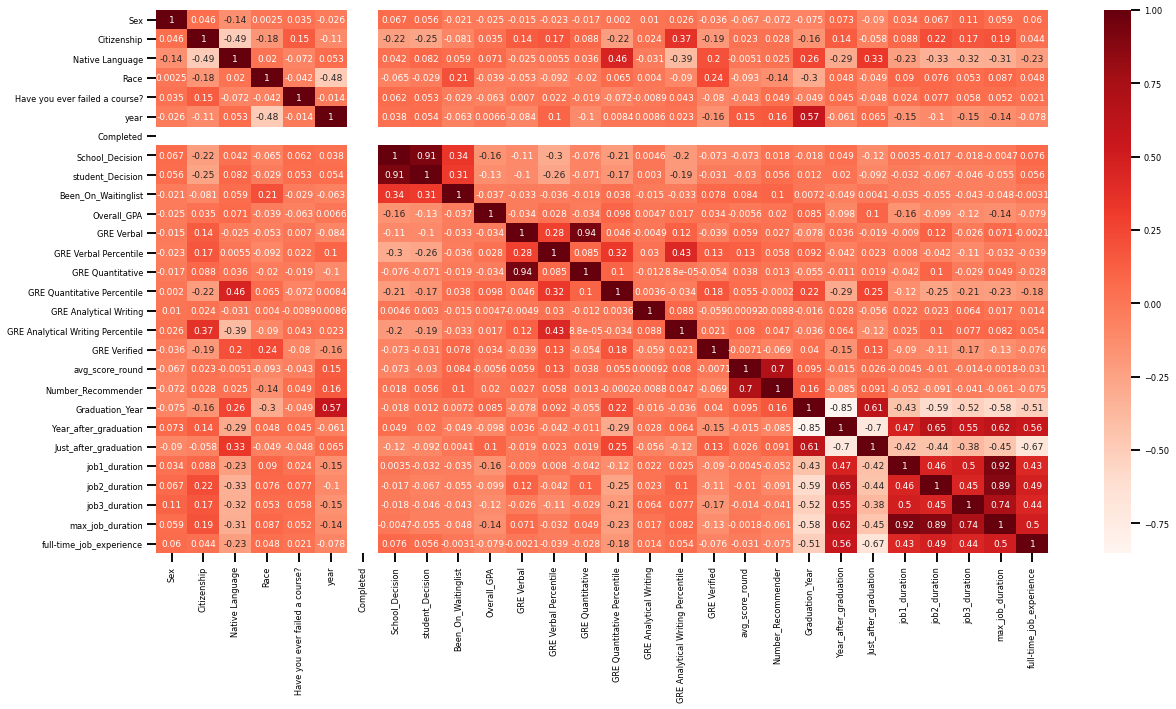

In [51]:
# heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,10))
sns.set_context('talk', font_scale = 0.5)
sns.heatmap(df_complete.iloc[:,1:].corr(), cmap = 'Reds', annot = True)

In [52]:
feature_cols = ['Race','Native Language','Citizenship','Have you ever failed a course?','Overall_GPA']

In [53]:
x= df_complete[feature_cols]
y = df_complete['School_Decision']
y2 = df_complete['student_Decision']
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=1234)
# x_train, x_test, y_train, y_test = train_test_split(x, y2 , test_size=0.2, random_state=1234)

In [54]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print(metrics.accuracy_score(y_test, pred))
print(classification_report(y_test, pred))


0.712280701754386
              precision    recall  f1-score   support

           0       0.67      0.62      0.64       239
           1       0.74      0.78      0.76       331

    accuracy                           0.71       570
   macro avg       0.70      0.70      0.70       570
weighted avg       0.71      0.71      0.71       570



In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
s1 = knn.score(X_test, Y_test)
print(s1)

Y_pred = knn.predict(X_test)
#s2 = accuracy_score(Y_test, Y_pred)
s3 = precision_score(Y_test, Y_pred)
#s4 = recall_score(Y_test, Y_pred)
#s5 = f1_score(Y_test, Y_pred)
#print("Accuracy score: ", s2)
print("Precision score: ", s3)
print("Recall score: ", s4)
print("F1 score: ", s5)
print(classification_report(Y_test, Y_pred))
#print("Roc_Auc_Score: ", roc_auc_score(Y_test, Y_pred))

0.7140350877192982
Precision score:  0.74


NameError: name 's4' is not defined

In [ ]:
ada = AdaBoostClassifier(random_state = 20, algorithm = 'SAMME.R', learning_rate = 0.8, n_estimators = 100)
ada.fit(X_train, Y_train)
s1 = ada.score(X_test, Y_test)
print(s1)

Y_pred = ada.predict(X_test)
#s2 = accuracy_score(Y_test, Y_pred)
s3 = precision_score(Y_test, Y_pred)
s4 = recall_score(Y_test, Y_pred)
s5 = f1_score(Y_test, Y_pred)
#print("Accuracy score: ", s2)
print("Precision score: ", s3)
print("Recall score: ", s4)
print("F1 score: ", s5)
print(classification_report(Y_test, Y_pred))
#print("Roc_Auc_Score: ", roc_auc_score(Y_test, Y_pred))
# get_feature_importance(ada, predictors)

In [56]:
# Decision Tree  using GridSearchCV to find optimal parameters
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')

#training
grid_tree.fit(X_train, Y_train)
#print best parameters
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20)
0.7491324465008675


In [57]:
df_complete.head()

Ref  Sex  Citizenship  Native Language  Race  \
0  511330193    1            0               24     4   
1  723116564    0            0               14     4   
2  533806749    0            0               14     4   
3  253306511    0            0               14     4   
7   60206854    1            0               51    11   

   Have you ever failed a course?                    Sub-Category  \
0                             0.0           Computational Methods   
1                             0.0           Computational Methods   
2                             0.0         Statistical Methodology   
3                             0.0         Statistical Methodology   
7                             0.0  Health and Biomedical Sciences   

  Birth Country  year  Completed  School_Decision  student_Decision  \
0            IN  2021          1                1                 4   
1            IN  2021          1                0                 0   
2            IN  2021          1                1                 4   
3            IN  2021          1                1                 4   
7            IN  2017          1                1                 4   

  final_Decision  Been_On_Waitinglist  Overall_GPA  GRE Verbal  \
0            NaN                    0        0.000         NaN   
1   Accept Offer                    0        3.560       157.0   
2            NaN                    0        2.920       146.0   
3            NaN                    0        3.288         NaN   
7            NaN                    0        3.096         NaN   

   GRE Verbal Percentile  GRE Quantitative  GRE Quantitative Percentile  \
0                    NaN               NaN                          NaN   
1                   75.0             168.0                         92.0   
2                   28.0             163.0                         80.0   
3                    NaN               NaN                          NaN   
7                    NaN               NaN                          NaN   

   GRE Analytical Writing  GRE Analytical Writing Percentile  GRE Verified  \
0                     NaN                                NaN             0   
1                     3.5                               38.0             1   
2                     3.0                               14.0             1   
3                     NaN                                NaN             0   
7                     NaN                                NaN             0   

   avg_score_round  Number_Recommender  Graduation_Year Graduation_Country  \
0              4.0                   3           2020.0              India   
1              5.0                   3           2017.0              India   
2              4.0                   3           2021.0              India   
3              5.0                   3           2014.0              India   
7              3.0                   3           2015.0              India   

   Year_after_graduation  Just_after_graduation  job1_duration  job2_duration  \
0                    1.0                    1.0            NaN            NaN   
1                    4.0                    0.0            NaN            NaN   
2                    0.0                    1.0           61.0          121.0   
3                    7.0                    0.0            NaN         1612.0   
7                    2.0                    0.0            NaN            NaN   

   job3_duration  max_job_duration  full-time_job_experience  
0            NaN               NaN                         0  
1            NaN               NaN                         0  
2           92.0               4.0                         0  
3            NaN              54.0                         1  
7            NaN               NaN                         0

In [58]:
null_mean=df_complete["Overall_GPA"].mean()
dfIN=df_complete[df_complete['Birth Country'] == "IN"]

In [59]:
dfIN["Overall_GPA"]

0       0.000000
1       3.560000
2       2.920000
3       3.288000
7       3.096000
14      2.996000
17      3.176000
23      0.000000
25      3.504000
27      3.532000
33      0.000000
41      0.000000
42      2.572000
43      0.000000
44      2.916000
47      2.868000
58      3.160000
72      2.676000
73      3.162400
86      3.224000
88      2.884000
89      3.328000
90      2.996000
92      3.440000
97      0.000000
99      4.000000
100     3.164000
103     0.000000
104     2.528000
105     3.188000
106     3.264000
107     3.016000
110     3.172000
113     3.522000
117     2.960000
118     2.668000
119     3.612000
123     3.536000
125     3.110400
133     2.900000
134     2.972800
138     0.000000
143     0.000000
144     0.000000
145     0.000000
149     3.096000
151     2.480000
153     3.224000
154     3.080000
155     3.300000
156     0.000000
158     2.680000
159     3.080000
168     3.249000
169     3.249000
170     3.220000
171     3.120000
173     3.000000
182     2.0480

In [60]:
alpha=0.05
ztest_Score, p_value= ztest(dfIN["Overall_GPA"],value = null_mean, alternative='smaller')
if(p_value <  alpha):
  print("Reject Null Hypothesis, Indian students obtain a lower GPA from their institution than average applicant GPA")
else:
  print("Fail to Reject NUll Hypothesis")

Reject Null Hypothesis, Indian students obtain a lower GPA from their institution than average applicant GPA


In [61]:
dfCH=df_complete[df_complete['Birth Country'] == "CH"]

In [62]:
rommender_mean=df_complete["avg_score_round"].mean()
rommender_mean

3.392129304286718

In [63]:
alpha=0.05
ztest_Score, p_value= ztest(dfCH["avg_score_round"],value = rommender_mean, alternative='larger')
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis,Chinese students didn't get a better remmendation rating than average")

Fail to Reject NUll Hypothesis,Chinese students didn't get a better remmendation rating than average


In [64]:
p_value

0.45219410840276403

In [65]:
alpha=0.05
ztest_Score, p_value= ztest(dfCH["avg_score_round"],value = rommender_mean, alternative='larger')
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis,Chinese students didn't get a better remmendation rating than average")

Fail to Reject NUll Hypothesis,Chinese students didn't get a better remmendation rating than average


In [66]:
from statsmodels.stats.proportion import proportions_ztest

In [67]:
df_gre.head()

Ref  Application Ref Program (ASE) Entry Term    Degree  \
0  511330193        329180291  Data Science  Fall 2021  Master's   
1  723116564        548103259  Data Science  Fall 2021  Master's   
2  533806749         65652284  Data Science  Fall 2021  Master's   
3  253306511        853551115  Data Science  Fall 2021  Master's   
7   60206854        547158581  Data Science  Fall 2017  Master's   

                     Sub-Category Entry Term.1 Time Status  \
0           Computational Methods    Fall 2021   Full Time   
1           Computational Methods    Fall 2021   Full Time   
2         Statistical Methodology    Fall 2021   Full Time   
3         Statistical Methodology    Fall 2021   Full Time   
7  Health and Biomedical Sciences    Fall 2017   Full Time   

   Tuition Percentage          Decision 1 Decision 1 Confirmed Date  \
0                 NaN                Deny       2021-03-16 12:25:15   
1                40.0  Admit/Accept Offer       2021-04-13 02:55:31   
2                 NaN                Deny       2021-03-09 10:54:49   
3                 NaN            Waitlist       2021-03-16 12:17:18   
7                 NaN                Deny       2017-03-14 13:14:27   

  Decision 1 Released Date Decision 1 Received Date Decision 1 Comments  \
0      2021-03-16 13:15:00      2021-03-16 13:40:18                 NaN   
1      2021-04-13 02:55:31      2021-04-20 10:50:45                 NaN   
2      2021-03-09 15:00:00      2021-03-09 16:08:11                 NaN   
3      2021-03-16 14:00:00      2021-03-16 14:23:48                 NaN   
7      2017-03-14 13:30:00      2017-03-14 13:46:10                 NaN   

  Decision 2 Decision 2 Confirmed Date Decision 2 Released Date  \
0        NaN                       NaT                      NaT   
1      Admit       2021-03-10 14:36:57      2021-03-11 16:00:00   
2        NaN                       NaT                      NaT   
3        NaN                       NaT                      NaT   
7        NaN                       NaT                      NaT   

  Decision 2 Received Date  Decision 2 Comments Decision 3  \
0                      NaT                  NaN        NaN   
1      2021-03-11 21:09:42                  NaN        NaN   
2                      NaT                  NaN        NaN   
3                      NaT                  NaN        NaN   
7                      NaT                  NaN        NaN   

  Decision 3 Confirmed Date Decision 3 Released Date Decision 3 Received Date  \
0                       NaT                      NaT                      NaT   
1                       NaT                      NaT                      NaT   
2                       NaT                      NaT                      NaT   
3                       NaT                      NaT                      NaT   
7                       NaT                      NaT                      NaT   

   Decision 3 Comments Sex Gender Identity  Pronoun    Birth State  \
0                  NaN   M             Man       He      Karnataka   
1                  NaN   F           Woman  She/Her  Uttar Pradesh   
2                  NaN   F           Woman      Her         Punjab   
3                  NaN   F           Woman      She          Bihar   
7                  NaN   M             NaN      NaN  Uttar Pradesh   

  Birth Country  Age at App Submission   Age   Race Hispanic  URM  \
0            IN                   22.0  22.0  Asian        N  NaN   
1            IN                   26.0  26.0  Asian        N  NaN   
2            IN                   21.0  21.0  Asian        N  NaN   
3            IN                   28.0  29.0  Asian        N  NaN   
7            IN                   23.0  28.0    NaN      NaN  NaN   

  Native Language Citizenship Citizenship1 Citizenship2  \
0              KN          FN        India          NaN   
1              HI          FN        India          NaN   
2              HI          FN        India          NaN   
3             

In [15]:
df_gre['School_Decision'].replace("Waitlist", "Deny")

0           Deny
1          Admit
2           Deny
3           Deny
7           Deny
8           Deny
9           Deny
10         Admit
11         Admit
14          Deny
17          Deny
18         Admit
19         Admit
20         Admit
21         Admit
23          Deny
24          Deny
25          Deny
26         Admit
27          Deny
31          Deny
32          Deny
33         Admit
36          Deny
37          Deny
38         Admit
39          Deny
40         Admit
41          Deny
42          Deny
43          Deny
44          Deny
45          Deny
46         Admit
47          Deny
49          Deny
50         Admit
51         Admit
52         Admit
54          Deny
55         Admit
56          Deny
58          Deny
61         Admit
64         Admit
68         Admit
69         Admit
70         Admit
71         Admit
72          Deny
73          Deny
76          Deny
77         Admit
78          Deny
80         Admit
84         Admit
85          Deny
86          Deny
88          De

In [71]:
gre_2021_not_take_admit = len(df_gre[(df_gre['School_Decision']=="Admit") & (df_gre['GRE Take or Not']==0) & (df_gre["Entry Term.1"] == "Fall 2021")])
gre_2021_not_take = len(df_gre[(df_gre['GRE Take or Not']==0) & (df_gre["Entry Term.1"] == "Fall 2021")])
gre_2021_take = len(df_gre[(df_gre['GRE Take or Not']==1) & (df_gre["Entry Term.1"] == "Fall 2021")])
gre_2021_take_admit = len(df_gre[(df_gre['School_Decision']=="Admit") & (df_gre['GRE Take or Not']==1) & (df_gre["Entry Term.1"] == "Fall 2021")])


In [72]:
gre_2020_not_take_admit = len(df_gre[(df_gre['School_Decision']=="Admit") & (df_gre['GRE Take or Not']==0) & (df_gre["Entry Term.1"] == "Fall 2020")])
gre_2020_not_take = len(df_gre[(df_gre['GRE Take or Not']==0) & (df_gre["Entry Term.1"] == "Fall 2020")])
gre_2020_take = len(df_gre[(df_gre['GRE Take or Not']==1) & (df_gre["Entry Term.1"] == "Fall 2020")])
gre_2020_take_admit = len(df_gre[(df_gre['School_Decision']=="Admit") & (df_gre['GRE Take or Not']==1) & (df_gre["Entry Term.1"] == "Fall 2020")])


In [73]:
gre_not_take_admit=gre_2020_not_take_admit+gre_2021_not_take_admit
gre_not_take = gre_2020_not_take + gre_2021_not_take
gre_take =gre_2021_take+gre_2020_take
gre_take_admit=gre_2020_take_admit+gre_2021_take_admit

In [74]:
count = np.array([gre_not_take_admit,gre_take_admit])
n = np.array([gre_not_take ,gre_take])

In [75]:
stat,p_value = proportions_ztest(count,n,alternative = "smaller")

In [76]:
p_value

0.018198695242647958

In [77]:
count

array([ 93, 253])

In [78]:
n

array([366, 805])

In [85]:
def cal_var(n, count):
    p = count/n
    var = (p*(1-p))/n
    return var

In [86]:
var_1 = cal_var(n,count)
var_1

array([0.00051785, 0.00026771])

In [87]:
gre_2020_take_low = len(df_gre[(df_gre['GRE Take or Not']==1) & (df_gre["Entry Term.1"] == "Fall 2020")&((df_gre['GRE Verbal']+df_gre['GRE Quantitative'])<320)])
gre_2020_take_admit_low = len(df_gre[(df_gre['School_Decision']=="Admit") & (df_gre['GRE Take or Not']==1) & (df_gre["Entry Term.1"] == "Fall 2020") & ((df_gre['GRE Verbal']+df_gre['GRE Quantitative'])<320)])
gre_2021_take_low = len(df_gre[(df_gre['GRE Take or Not']==1) & (df_gre["Entry Term.1"] == "Fall 2021")&((df_gre['GRE Verbal']+df_gre['GRE Quantitative']<320))])
gre_2021_take_admit_low = len(df_gre[(df_gre['School_Decision']=="Admit") & (df_gre['GRE Take or Not']==1) & (df_gre["Entry Term.1"] == "Fall 2021") & ((df_gre['GRE Verbal']+df_gre['GRE Quantitative']<320))])
gre_take_low =gre_2021_take_low+gre_2020_take_low
gre_take_admit_low = gre_2021_take_admit_low + gre_2020_take_admit_low

In [88]:
count_1 = np.array([gre_not_take_admit,gre_take_admit_low])
n_1 = np.array([gre_not_take ,gre_take_low])

In [89]:
stat,p_value_2 = proportions_ztest(count_1,n_1,alternative = "larger")

In [90]:
p_value_2

0.020603545099222024

In [91]:
n_1

array([366, 337])

In [92]:
count_1

array([93, 64])

In [93]:
var_2 = cal_var(n_1,count_1)
var_2

array([0.00051785, 0.00045651])

In [127]:
gre_2020_take_m = len(df_gre[(df_gre['GRE Take or Not']==1) & (df_gre["Entry Term.1"] == "Fall 2020")&((df_gre['GRE Verbal']+df_gre['GRE Quantitative']<322))&((df_gre['GRE Verbal']+df_gre['GRE Quantitative']>319))])
gre_2020_take_admit_m = len(df_gre[(df_gre['School_Decision']=="Admit") & (df_gre['GRE Take or Not']==1) & (df_gre["Entry Term.1"] == "Fall 2020") & ((df_gre['GRE Verbal']+df_gre['GRE Quantitative']<322))&((df_gre['GRE Verbal']+df_gre['GRE Quantitative']>319))])
gre_2021_take_m = len(df_gre[(df_gre['GRE Take or Not']==1) & (df_gre["Entry Term.1"] == "Fall 2021")&((df_gre['GRE Verbal']+df_gre['GRE Quantitative']<322))&((df_gre['GRE Verbal']+df_gre['GRE Quantitative']>319))])
gre_2021_take_admit_m = len(df_gre[(df_gre['School_Decision']=="Admit") & (df_gre['GRE Take or Not']==1) & (df_gre["Entry Term.1"] == "Fall 2021") & ((df_gre['GRE Verbal']+df_gre['GRE Quantitative']<322))&((df_gre['GRE Verbal']+df_gre['GRE Quantitative']>319))])
gre_take_m =gre_2021_take_m+gre_2020_take_m
gre_take_admit_m = gre_2021_take_admit_m + gre_2020_take_admit_m

In [128]:
count_2 = np.array([gre_not_take_admit,gre_take_admit_m])
n_2 = np.array([gre_not_take ,gre_take_m])

In [129]:
stat,p_value_3 = proportions_ztest(count_2,n_2,alternative = "larger")

In [130]:
p_value_3

0.6562897481019452

In [131]:
count_2

array([93, 25])

In [132]:
n_2

array([366,  91])

In [68]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)